In [1]:
import uproot as up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
labels = ['QCD', 'WZ', 'top', 'higgs']

In [3]:
path = "training/Pythia/kin/PFN/predict_output"

In [4]:
with up.open(f"{path}/pred_sample_10M_balanced_noinf_man.root") as file:
    # Assuming there's only one tree in the file
    tree_name = file.keys()[0]
    tree = file[tree_name]
    
    # Load the data into a pandas DataFrame
    data_10M_balanced_no_inf_man = tree.arrays(library="pd")

In [5]:
data_10M_balanced_no_inf_man[["label_QCD", "label_WZ", "label_top", "label_higgs"]] = data_10M_balanced_no_inf_man[["label_QCD", "label_WZ", "label_top", "label_higgs"]].replace({"True": True, "False": False}).astype(bool)
data_10M_balanced_no_inf_man["true_label"] = data_10M_balanced_no_inf_man[["label_QCD", "label_WZ", "label_top", "label_higgs"]].idxmax(axis=1).str.split("_").str[1]
data_10M_balanced_no_inf_man["predict_label"] = data_10M_balanced_no_inf_man[["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]].idxmax(axis=1).str.split("_").str[2]


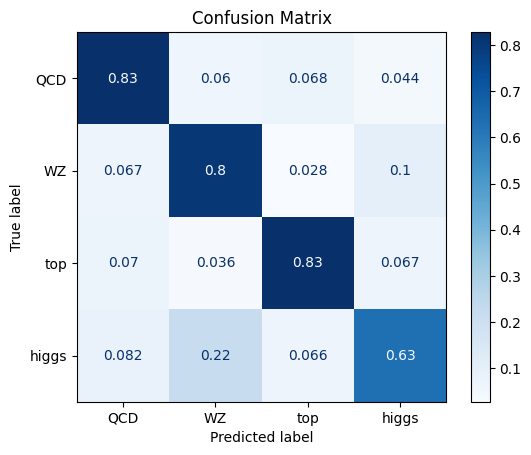

In [6]:
# Compute confusion matrix
cm = confusion_matrix(data_10M_balanced_no_inf_man["true_label"], data_10M_balanced_no_inf_man["predict_label"], labels=labels, normalize='true')

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


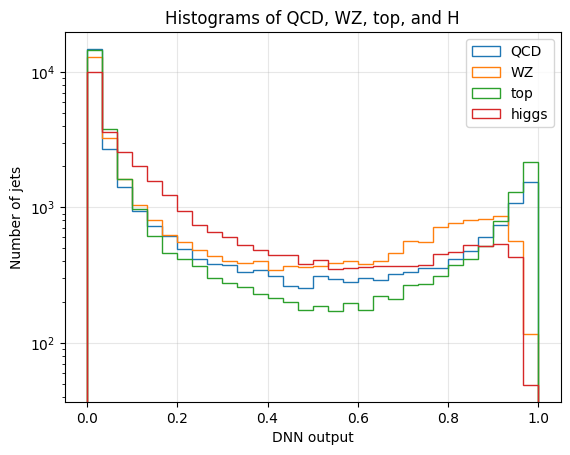

In [7]:
# Plot histograms for each column in one plot
# plt.figure(figsize=(10, 6))

columns = ["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]
for column in columns:
    plt.hist(data_10M_balanced_no_inf_man[column], bins=30, range=[0, 1], histtype='step', label=column.split("_")[2])

# Add labels, legend, and title
plt.xlabel("DNN output")
plt.ylabel("Number of jets")
plt.yscale('log')
plt.title("Histograms of QCD, WZ, top, and H")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


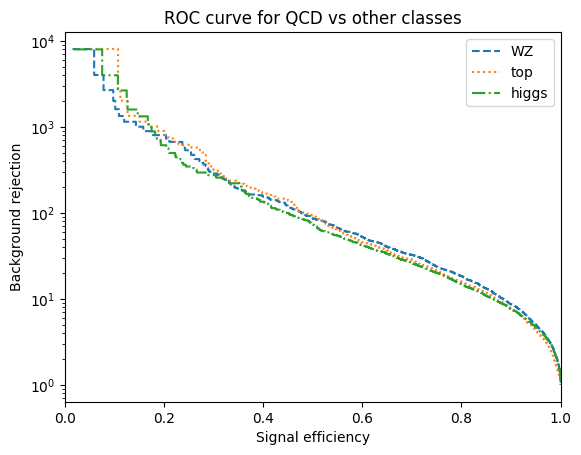

/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


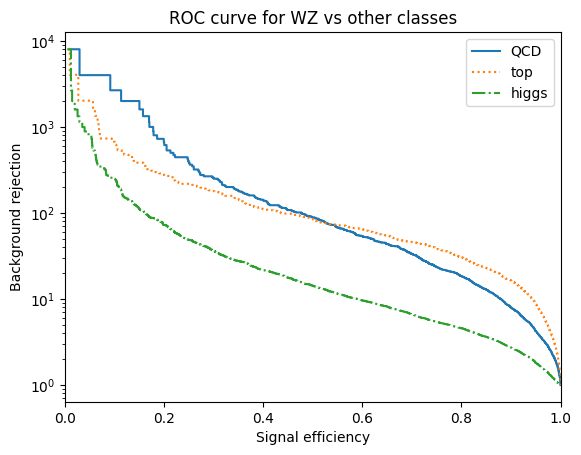

/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


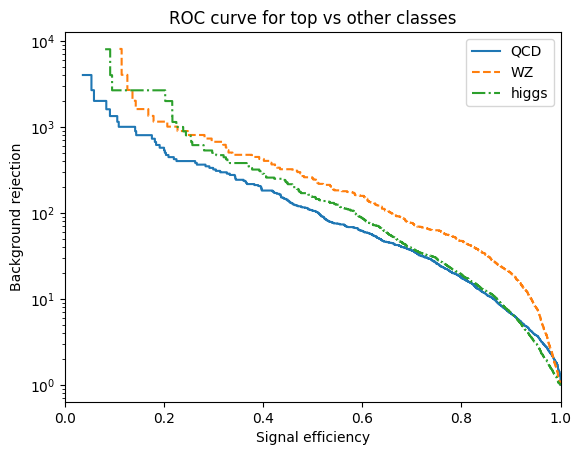

/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/576761053.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


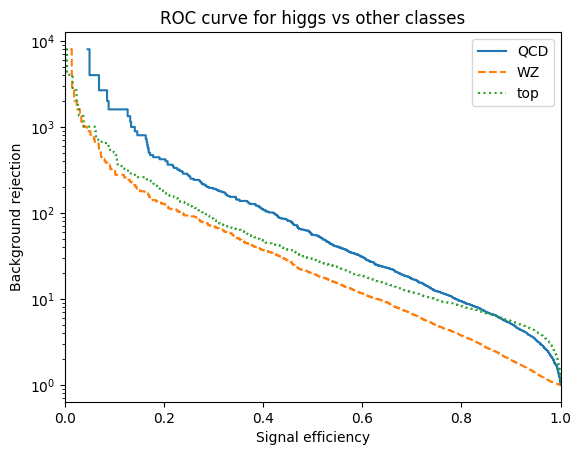

In [8]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot',(5, (10, 3))]

# BKG rejection roc curve for each class vs the other classes
for label in labels:
#plot roc curve for each class vs the other classes
    plt.figure()
    #loop over the classes except label
    for i, label2 in enumerate(labels):
        if label == label2:
            continue
        #make mask that selects only the events of label and label2
        mask = (data_10M_balanced_no_inf_man["true_label"] == label) | (data_10M_balanced_no_inf_man["true_label"] == label2)
        #calculate the roc curve for label vs label2
        fpr, tpr, threshold = roc_curve( data_10M_balanced_no_inf_man["true_label"][mask], data_10M_balanced_no_inf_man[f"score_label_{label}"][mask], pos_label=label)
        #plot tpr vs 1/fpr
        plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
    plt.xlim(0, 1)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.yscale('log')
    plt.legend()
    plt.title(f'ROC curve for {label} vs other classes')
    plt.show()
    

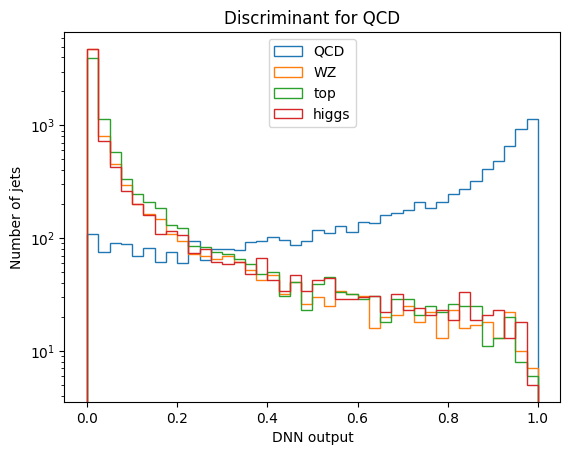

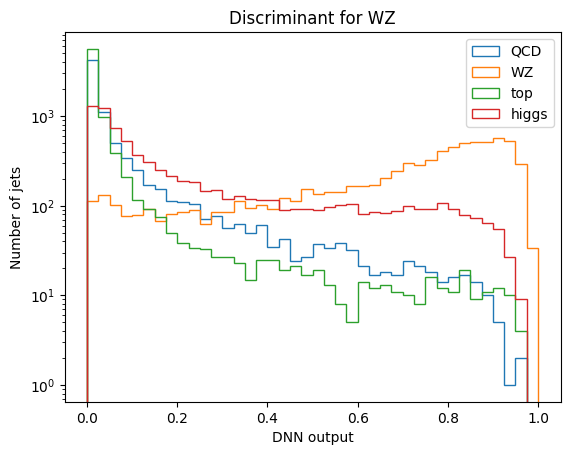

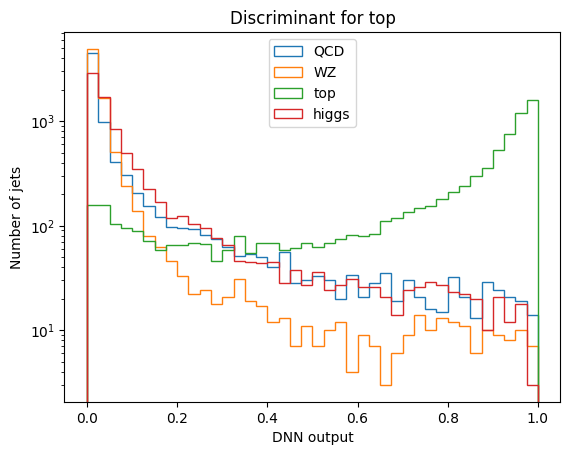

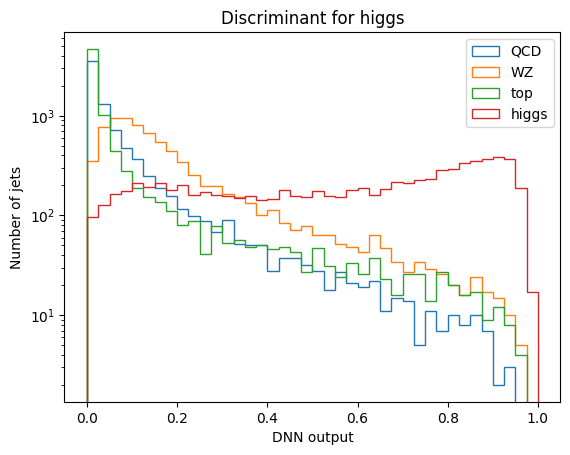

In [9]:
for label in labels:
    plt.figure()
    for i, label2 in enumerate(labels):
        disc = data_10M_balanced_no_inf_man[f"score_label_{label}"][(data_10M_balanced_no_inf_man["true_label"] == label2)]
        plt.hist( disc , bins=40 , range=(0,1) , histtype='step' , label=label2)
    plt.xlabel('DNN output')
    plt.ylabel('Number of jets')
    plt.yscale('log')
    plt.title(f'Discriminant for {label}')
    plt.legend()
    plt.show()
    

In [10]:
with up.open(f"{path}/pred_sample_5M.root") as file:
    # Assuming there's only one tree in the file
    tree_name = file.keys()[0]
    tree = file[tree_name]
    
    # Load the data into a pandas DataFrame
    data_5M = tree.arrays(library="pd")

In [11]:
data_5M[["label_QCD", "label_WZ", "label_top", "label_higgs"]] = data_5M[["label_QCD", "label_WZ", "label_top", "label_higgs"]].replace({"True": True, "False": False}).astype(bool)
data_5M["true_label"] = data_5M[["label_QCD", "label_WZ", "label_top", "label_higgs"]].idxmax(axis=1).str.split("_").str[1]
data_5M["predict_label"] = data_5M[["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]].idxmax(axis=1).str.split("_").str[2]


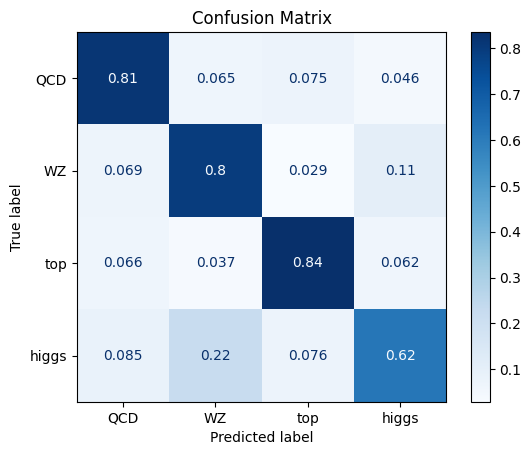

In [12]:
# Compute confusion matrix
cm = confusion_matrix(data_5M["true_label"], data_5M["predict_label"], labels=labels, normalize='true')

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


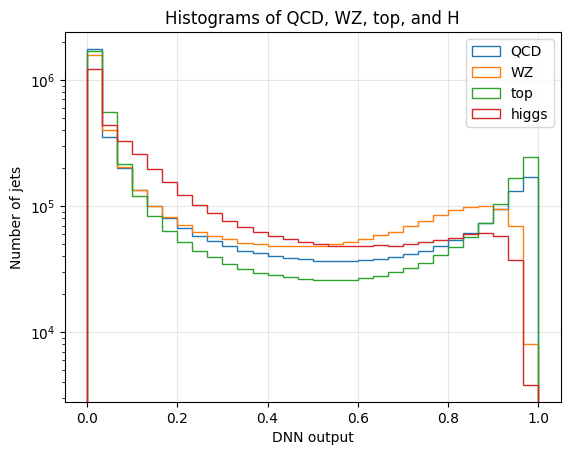

In [13]:
# Plot histograms for each column in one plot
# plt.figure(figsize=(10, 6))

columns = ["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]
for column in columns:
    plt.hist(data_5M[column], bins=30, range=[0, 1], histtype='step', label=column.split("_")[2])

# Add labels, legend, and title
plt.xlabel("DNN output")
plt.ylabel("Number of jets")
plt.yscale('log')
plt.title("Histograms of QCD, WZ, top, and H")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


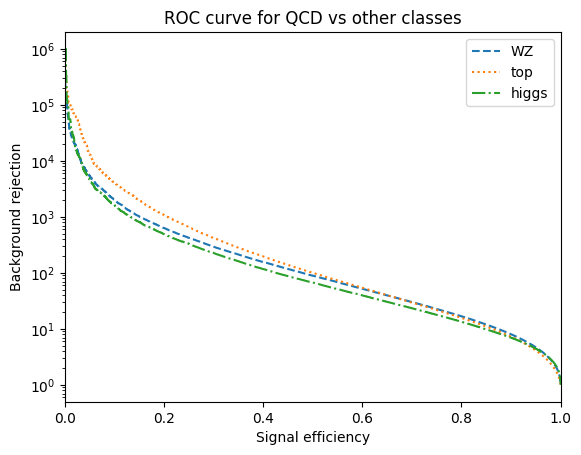

/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


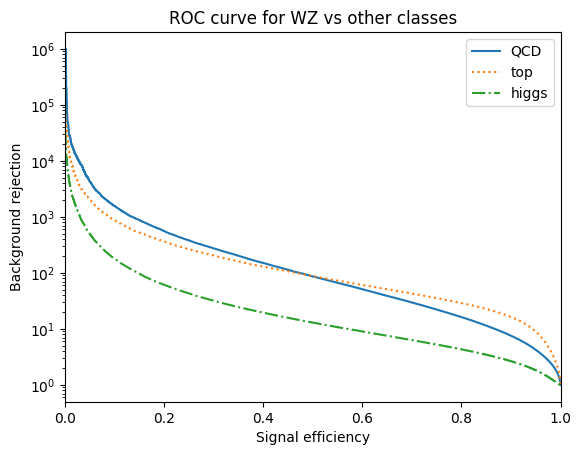

/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


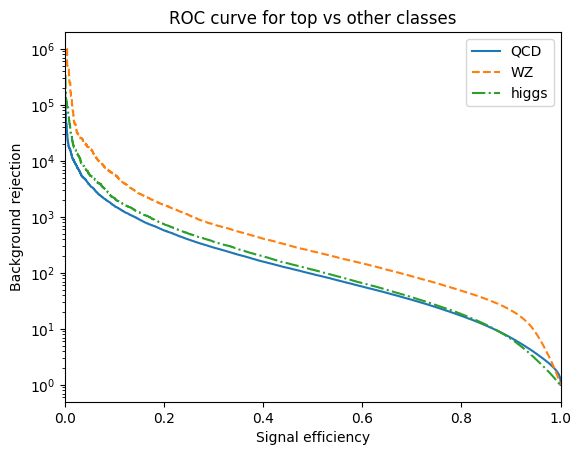

/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/3740034341.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


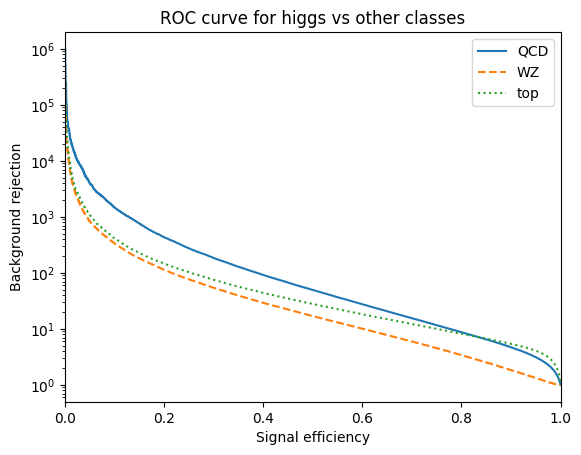

In [14]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot',(5, (10, 3))]

# BKG rejection roc curve for each class vs the other classes
for label in labels:
#plot roc curve for each class vs the other classes
    plt.figure()
    #loop over the classes except label
    for i, label2 in enumerate(labels):
        if label == label2:
            continue
        #make mask that selects only the events of label and label2
        mask = (data_5M["true_label"] == label) | (data_5M["true_label"] == label2)
        #calculate the roc curve for label vs label2
        fpr, tpr, threshold = roc_curve( data_5M["true_label"][mask], data_5M[f"score_label_{label}"][mask], pos_label=label)
        #plot tpr vs 1/fpr
        plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
    plt.xlim(0, 1)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.yscale('log')
    plt.legend()
    plt.title(f'ROC curve for {label} vs other classes')
    plt.show()
    

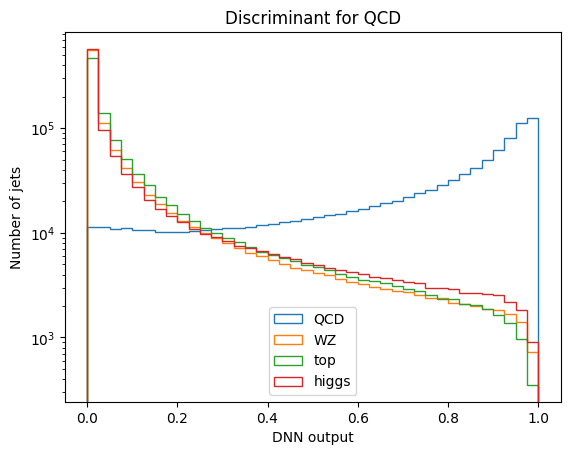

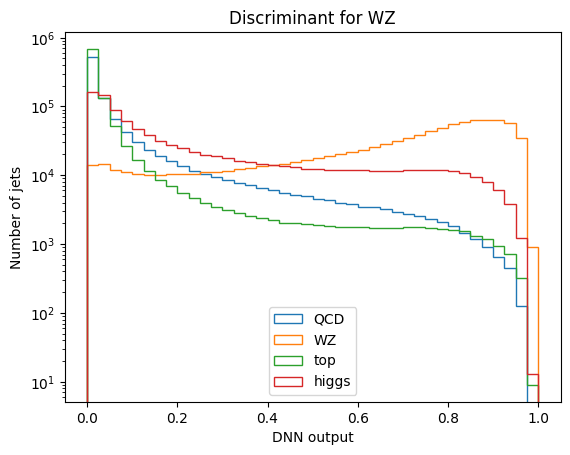

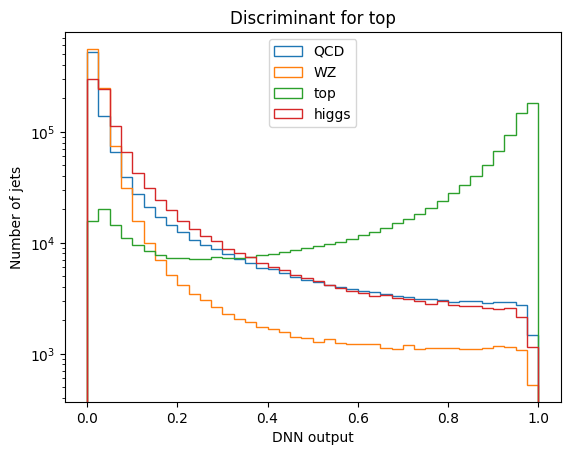

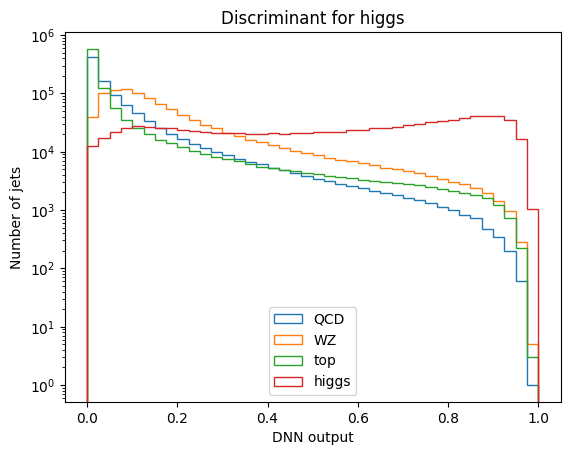

In [15]:
for label in labels:
    plt.figure()
    for i, label2 in enumerate(labels):
        disc = data_5M[f"score_label_{label}"][(data_5M["true_label"] == label2)]
        plt.hist( disc , bins=40 , range=(0,1) , histtype='step' , label=label2)
    plt.xlabel('DNN output')
    plt.ylabel('Number of jets')
    plt.yscale('log')
    plt.title(f'Discriminant for {label}')
    plt.legend()
    plt.show()
    

In [16]:
with up.open(f"{path}/pred_sample_10M.root") as file:
    # Assuming there's only one tree in the file
    tree_name = file.keys()[0]
    tree = file[tree_name]
    
    # Load the data into a pandas DataFrame
    data_10M = tree.arrays(library="pd")

In [17]:
data_10M[["label_QCD", "label_WZ", "label_top", "label_higgs"]] = data_10M[["label_QCD", "label_WZ", "label_top", "label_higgs"]].replace({"True": True, "False": False}).astype(bool)
data_10M["true_label"] = data_10M[["label_QCD", "label_WZ", "label_top", "label_higgs"]].idxmax(axis=1).str.split("_").str[1]
data_10M["predict_label"] = data_10M[["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]].idxmax(axis=1).str.split("_").str[2]


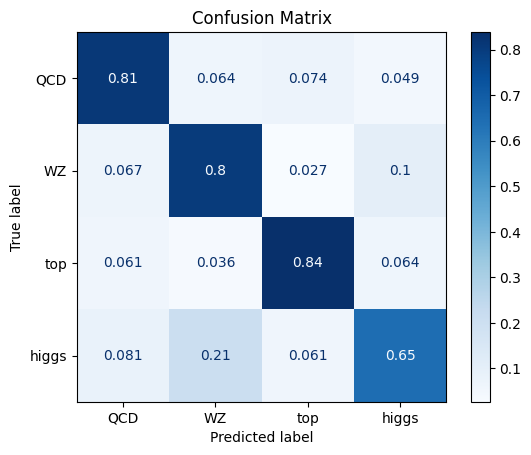

In [18]:
# Compute confusion matrix
cm = confusion_matrix(data_10M["true_label"], data_10M["predict_label"], labels=labels, normalize='true')

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


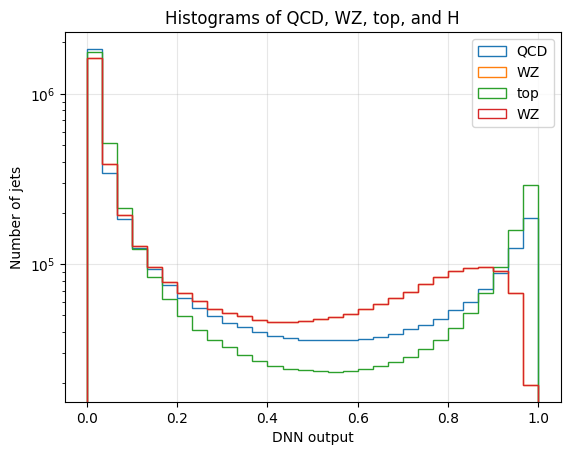

In [23]:
# Plot histograms for each column in one plot
# plt.figure(figsize=(10, 6))

columns = ["score_label_QCD", "score_label_WZ", "score_label_top", "score_label_higgs"]
for column in columns:
    plt.hist(data_10M[column], bins=30, range=[0, 1], histtype='step', label=column.split("_")[2])

# Add labels, legend, and title
plt.xlabel("DNN output")
plt.ylabel("Number of jets")
plt.yscale('log')
plt.title("Histograms of QCD, WZ, top, and H")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


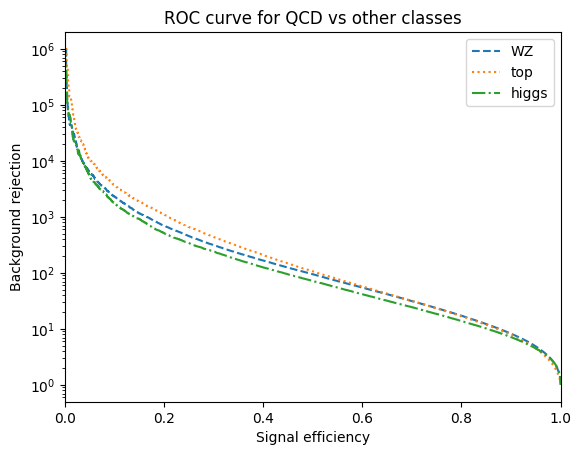

/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


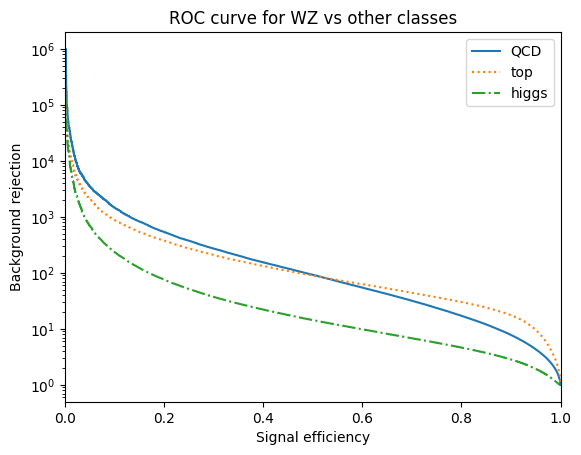

/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


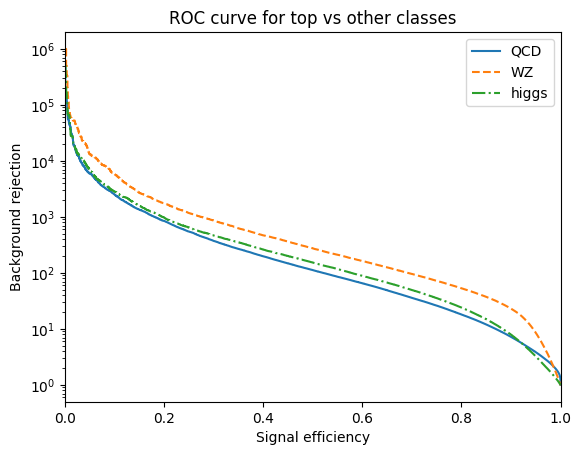

/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
/tmp/ipykernel_662/2384078291.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])


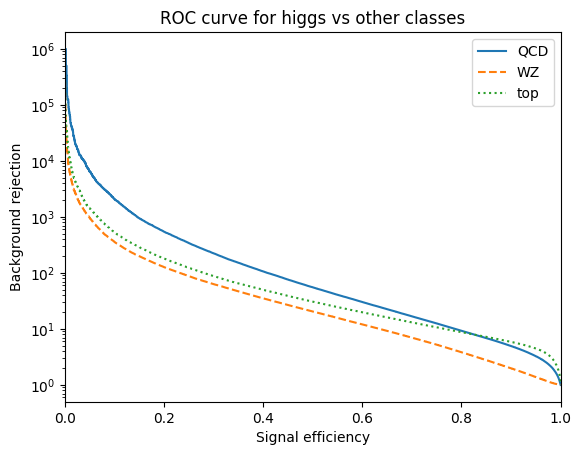

In [20]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot',(5, (10, 3))]

# BKG rejection roc curve for each class vs the other classes
for label in labels:
#plot roc curve for each class vs the other classes
    plt.figure()
    #loop over the classes except label
    for i, label2 in enumerate(labels):
        if label == label2:
            continue
        #make mask that selects only the events of label and label2
        mask = (data_10M["true_label"] == label) | (data_10M["true_label"] == label2)
        #calculate the roc curve for label vs label2
        fpr, tpr, threshold = roc_curve( data_10M["true_label"][mask], data_10M[f"score_label_{label}"][mask], pos_label=label)
        #plot tpr vs 1/fpr
        plt.plot(tpr,1./fpr, label=label2, linestyle=linestyles[i])
    plt.xlim(0, 1)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.yscale('log')
    plt.legend()
    plt.title(f'ROC curve for {label} vs other classes')
    plt.show()
    

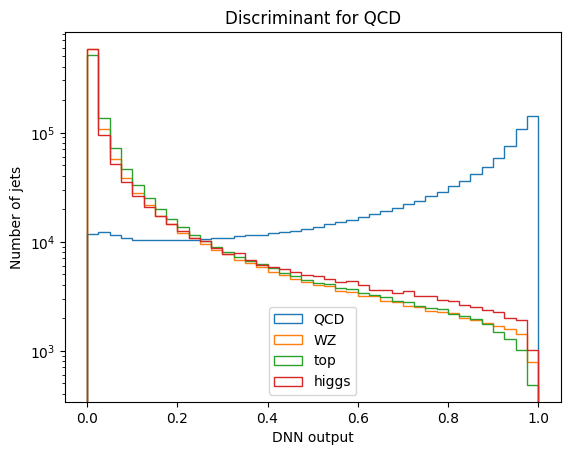

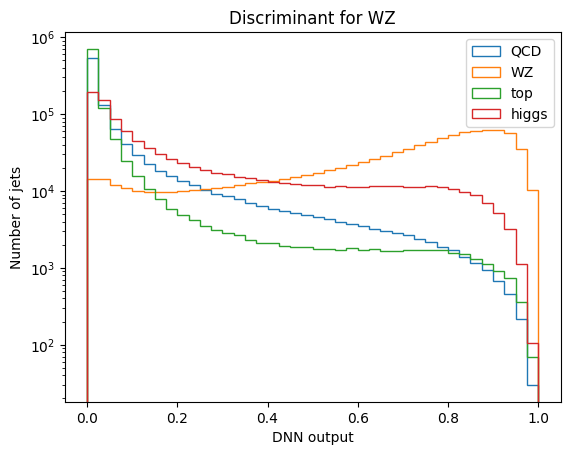

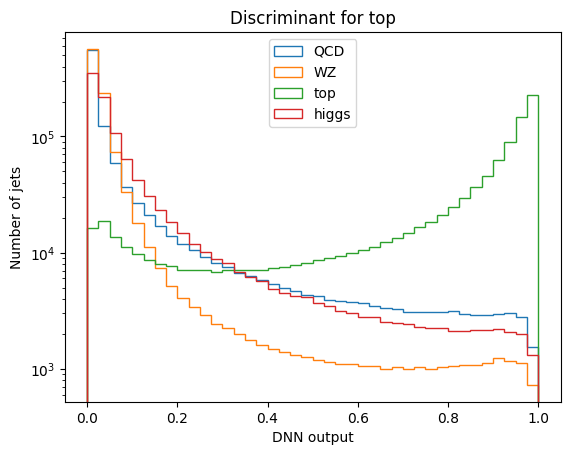

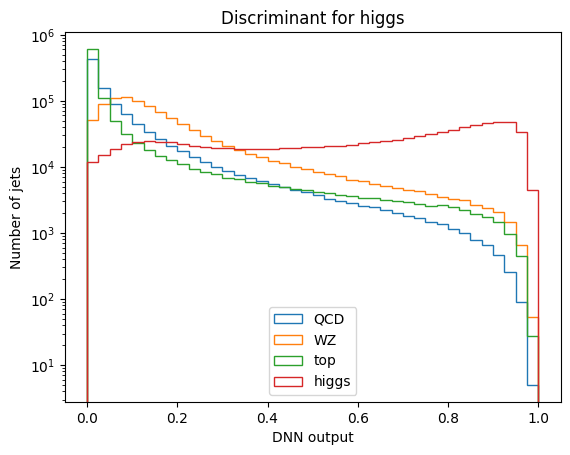

In [22]:
for label in labels:
    plt.figure()
    for i, label2 in enumerate(labels):
        disc = data_10M[f"score_label_{label}"][(data_10M["true_label"] == label2)]
        plt.hist( disc , bins=40 , range=(0,1) , histtype='step' , label=label2)
    plt.xlabel('DNN output')
    plt.ylabel('Number of jets')
    plt.yscale('log')
    plt.title(f'Discriminant for {label}')
    plt.legend()
    plt.show()
    